# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy.random as r
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    #ignore = ["age", "Medu", "Fedu","Mjob", "Fjob", 'reason', 'guardian','traveltime', 'studytime',
    #       'failures']
    #print(X.columns)
    #print(X.iloc[0,:])
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape)
    return X

In [5]:
X_fixed = fixingfile(X)
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)

(649, 26)


# FROM here on out the markdown split up which model. Add cells according to which mark down. Here is the order
## 1. Linear Regression
## 2. Neutral Network 
## 3. SVM

# Multiple Linear Regression

In [6]:
N = y.shape[0]
print("Number of rows:", N)

Number of rows: 649


In [7]:
X_scale = StandardScaler()
X_fit= np.array(X_scale.fit_transform(X))

In [8]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.4)

In [9]:
print(y_test >= 10)
print(y_train >= 10)

[ True False False  True  True False  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
 False False  True False  True  True False False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
 False  True  True  True  True  True False False  True  True  True  True
 False  True False False  True  True  True  True False  True  True  True
 False  True False  True False  True  True  True  True  True  True False
  True False  True  True False False  True  True  True  True False  True
  True  True  True False  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True False
 False False False False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True  T

In [10]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        if y[i] >= 10:
            y_vect[i, 0] = 1
        else:
            y_vect[i, 1] = 1
    return y_vect

In [11]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)
print(y_v_train)
print("training set shape: ",y_v_train.shape)
print("testing set shape: ",y_v_test.shape)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [12]:
# Sigmoid activation function - depends on whether we want to use it or not
def f(z):
    return 1 / (1 + np.exp(-z))

def f_deriv(z):
    return f(z) * (1 - f(z))

In [13]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

# Need to initialize it with a normal distribution instead of random

In [14]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [15]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [16]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [17]:
#train NN without regularization
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.004):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l])) 
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [18]:
def train_rigde_nn(nn_structure, X, y, iter_num=3000, alpha=0.004, hyper = 0.01):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l])) 
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l]) + hyper * W[l]
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete they_test average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [19]:
def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [20]:
# three layers,
nn_structure = [26, 30, 2]
itter = [10,100,500,1000,3000]
# train the NN
w_vals = {}
b_vals = {}
avg_cost_vals = {}
for i in range(len(itter)):
    print("Trying " + str(itter[i]) + " iteration")
    w_vals[i], b_vals[i], avg_cost_vals[i] = train_nn(nn_structure, X_train, y_v_train, itter[i])


Trying 10 iteration
Starting gradient descent for 10 iterations
Iteration 0 of 10
Trying 100 iteration
Starting gradient descent for 100 iterations
Iteration 0 of 100
Trying 500 iteration
Starting gradient descent for 500 iterations
Iteration 0 of 500
Trying 1000 iteration
Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Trying 3000 iteration
Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


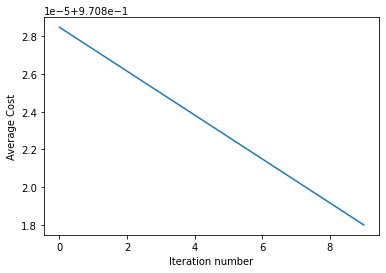

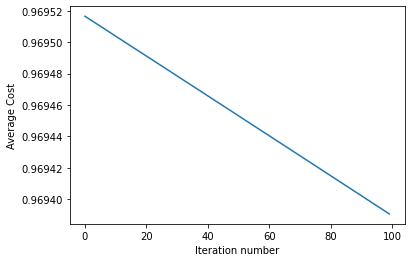

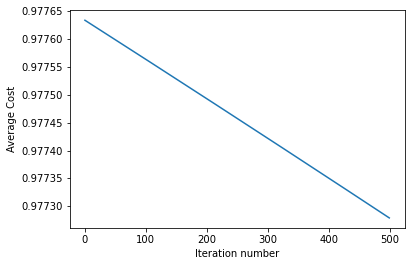

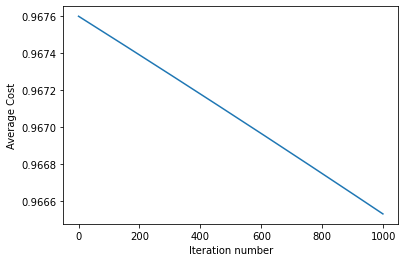

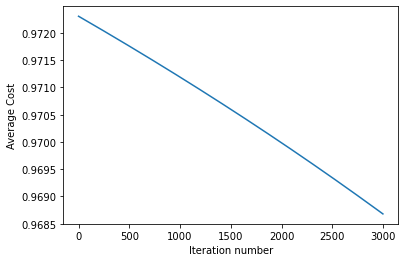

In [21]:
# plot the avg_cost_func depending on values
for i in range(len(itter)):
    plt.plot(avg_cost_vals[i])
    plt.ylabel('Average Cost')
    plt.xlabel('Iteration number')
    plt.block = False
    plt.show()

In [22]:
print(y_test)

[10.7  9.7  6.  12.4 14.4  9.3 10.   9.4 13.  10.7 10.1 10.4 16.  16.1
  9.7 15.4 13.  10.3 10.  10.3 14.4 13.7 12.7 13.4 11.6 15.4 16.4 12.
 10.7 15.   3.6 15.7  9.4 14.4 17.6 13.7  9.7  9.8 15.4  9.4 16.7 12.1
  7.4  9.7 11.7 14.7 12.4 11.  10.4 12.  15.3  8.4 13.  14.8 12.  14.1
 10.5 12.9 13.7  7.7  9.  11.  11.8 13.1 11.  10.4  9.7  4.2 12.2 11.4
 10.4 11.7  9.  12.7  9.5  7.3 13.  13.  14.1 10.4  7.1 13.3 13.7 10.4
  9.7 13.1  8.6 17.4  9.7 15.7 12.4 12.5 14.8 10.1 12.   8.7 10.   8.1
 13.  11.4  7.4  9.8 10.3 10.5 11.3 14.7  8.7 11.  11.4 16.4 13.3  9.4
 13.8 10.4  7.4 12.3 10.  10.3 16.4 13.1  9.1 16.1 13.5 10.  15.1 14.6
 12.  15.1 14.4  9.1 11.8  8.   9.1  6.5  9.4  2.1 10.3 11.4 17.3 14.8
  8.4 12.3 10.1 12.  11.3 13.2 17.3 15.1 10.3 12.1 12.  10.3 12.3 12.3
 11.1 10.7  7.2  7.1 16.  12.7 11.3 10.7 13.1 11.1 13.7 15.5 10.  14.7
 13.  13.7  8.7 13.2  7.1 14.  15.7 15.1 12.7  9.  10.6 12.8 12.4 12.4
  9.3  1.5 11.3  8.3 12.1 10.1 11.1 13.7 18.  10.3 10.7 12.4 17.3  9.1
 10.  1

                          0          1          2          3          4
training Acuracy  30.591260  29.820051  76.349614  76.349614  22.879177
testing Accuracy  33.076923  32.692308  71.538462  73.076923  26.923077
[33.07692307692307, 32.69230769230769, 71.53846153846153, 73.07692307692307, 26.923076923076923] [30.59125964010283, 29.82005141388175, 76.34961439588689, 76.34961439588689, 22.87917737789203]


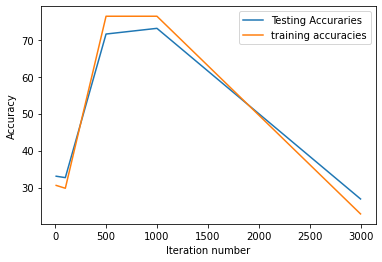

In [23]:

y_test = y_test >= 10
y_train = y_train >= 10
acc_tests = []
acc_trains = []
for i in range(len(itter)):
    y_pred_test = predict_y(w_vals[i], b_vals[i], X_test, 3)
    y_pred_train = predict_y(w_vals[i], b_vals[i], X_train, 3)
    acc_tests.append(accuracy_score(y_test, y_pred_test) * 100)
    acc_trains.append(accuracy_score(y_train, y_pred_train) * 100)
#to datafram
all_accuracy = np.vstack((acc_trains,acc_tests))
acc_table = pd.DataFrame(all_accuracy, index = ['training Acuracy', 'testing Accuracy'] )
print(acc_table)
acc_table.to_excel("sigma_noreg_3layer.xlsx")
#to exel
print(acc_tests,acc_trains)
plt.plot(itter,acc_tests)
plt.plot(itter,acc_trains)
plt.ylabel('Accuracy')
plt.xlabel('Iteration number')
plt.legend([ "Testing Accuraries", "training accuracies"])
plt.block = False
plt.show()

# # Ridge Regression

In [24]:
# three layers,
nn_structure = [26, 30, 2]
# train the NN
w_vals = {}
b_vals = {}
avg_cost_vals = {}
for i in range(len(itter)):
    print("Trying " + str(itter[i]) + " iteration")
    w_vals[i], b_vals[i], avg_cost_vals[i] = train_rigde_nn(nn_structure, X_train, y_v_train, itter[i])

Trying 10 iteration
Starting gradient descent for 10 iterations
Iteration 0 of 10
Trying 100 iteration
Starting gradient descent for 100 iterations
Iteration 0 of 100
Trying 500 iteration
Starting gradient descent for 500 iterations
Iteration 0 of 500


<ipython-input-12-0879e0f3e655>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Trying 1000 iteration
Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Trying 3000 iteration
Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


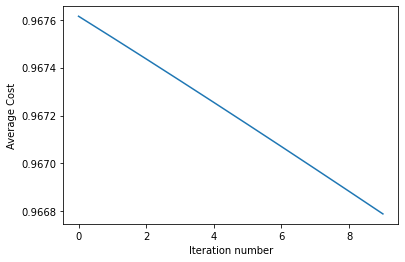

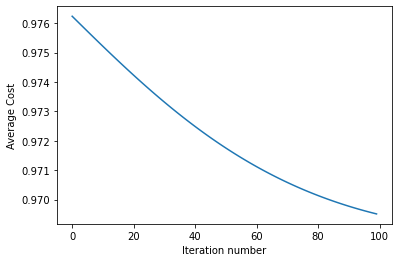

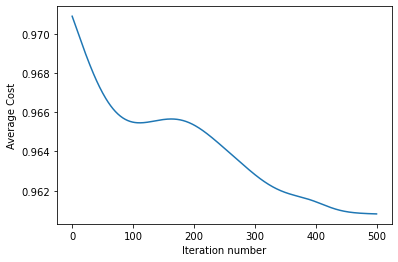

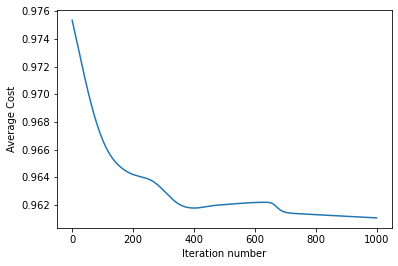

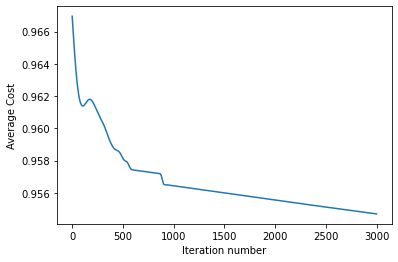

In [25]:
# plot the avg_cost_func depending on values
for i in range(len(itter)):
    plt.plot(avg_cost_vals[i])
    plt.ylabel('Average Cost')
    plt.xlabel('Iteration number')
    plt.block = False
    plt.show()

                          0          1          2          3          4
training Acuracy  22.622108  42.416452  23.393316  30.334190  29.305913
testing Accuracy  26.538462  47.692308  27.307692  34.615385  33.461538


<ipython-input-12-0879e0f3e655>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


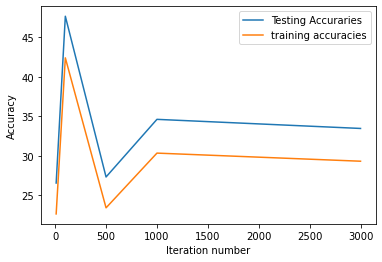

In [26]:
acc_tests = []
acc_trains = []
for i in range(len(itter)):
    y_pred_test = predict_y(w_vals[i], b_vals[i], X_test, 3)
    y_pred_train = predict_y(w_vals[i], b_vals[i], X_train, 3)
    acc_tests.append(accuracy_score(y_test, y_pred_test) * 100)
    acc_trains.append(accuracy_score(y_train, y_pred_train) * 100)
    
all_accuracy = np.vstack((acc_trains,acc_tests))
acc_table = pd.DataFrame(all_accuracy, index = ['training Acuracy', 'testing Accuracy'] )
print(acc_table)
acc_table.to_excel("sigma_rigdge_3layer.xlsx")

plt.plot(itter,acc_tests)
plt.plot(itter,acc_trains)
plt.ylabel('Accuracy')
plt.xlabel('Iteration number')
plt.legend([ "Testing Accuraries", "training accuracies"])
plt.block = False
plt.show()

## More Layers

In [27]:
# four layers,
nn_structure = [26,30,30, 2]
# train the NN
w_vals = {}
b_vals = {}
avg_cost_vals = {}
for i in range(len(itter)):
    print("Trying " + str(itter[i]) + " iteration")
    w_vals[i], b_vals[i], avg_cost_vals[i] = train_nn(nn_structure, X_train, y_v_train, itter[i])

Trying 10 iteration
Starting gradient descent for 10 iterations
Iteration 0 of 10
Trying 100 iteration
Starting gradient descent for 100 iterations
Iteration 0 of 100
Trying 500 iteration
Starting gradient descent for 500 iterations
Iteration 0 of 500
Trying 1000 iteration
Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Trying 3000 iteration
Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


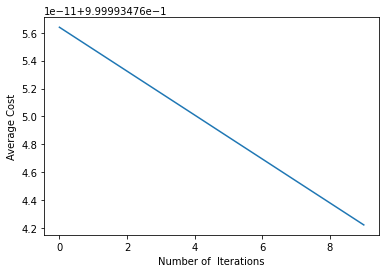

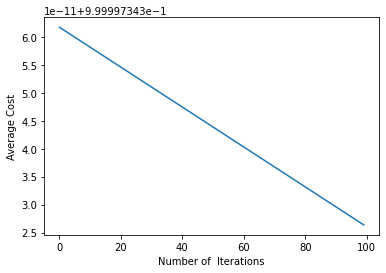

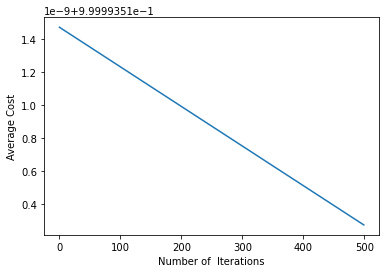

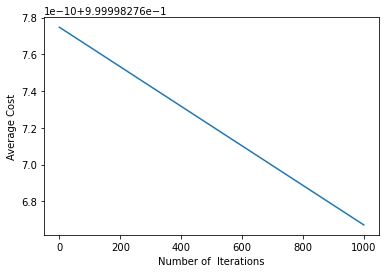

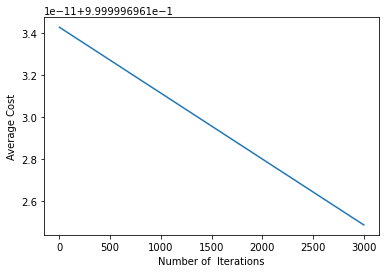

In [28]:
# plot the avg_cost_func depending on values
for i in range(len(itter)):
    plt.plot(avg_cost_vals[i])
    plt.ylabel('Average Cost')
    plt.xlabel('Number of  Iterations')
    plt.block = False
    plt.show()

[65.38461538461539, 73.46153846153847, 26.53846153846154, 26.923076923076923, 73.46153846153847] [72.49357326478149, 77.37789203084833, 22.62210796915167, 22.62210796915167, 77.37789203084833]
                          0          1          2          3          4
training Acuracy  72.493573  77.377892  22.622108  22.622108  77.377892
testing Accuracy  65.384615  73.461538  26.538462  26.923077  73.461538


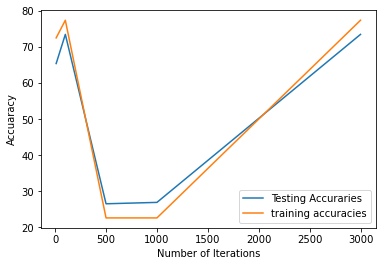

In [29]:
acc_tests = []
acc_trains = []
for i in range(len(itter)):
    y_pred_test = predict_y(w_vals[i], b_vals[i], X_test, 4)
    y_pred_train = predict_y(w_vals[i], b_vals[i], X_train, 4)
    acc_tests.append(accuracy_score(y_test, y_pred_test) * 100)
    acc_trains.append(accuracy_score(y_train, y_pred_train) * 100)
print(acc_tests,acc_trains)
all_accuracy = np.vstack((acc_trains,acc_tests))
acc_table = pd.DataFrame(all_accuracy, index = ['training Acuracy', 'testing Accuracy'] )
print(acc_table)
acc_table.to_excel("sigma_noreg_4layer.xlsx")
plt.plot(itter,acc_tests)
plt.plot(itter,acc_trains)
plt.ylabel('Accuaracy')
plt.xlabel('Number of Iterations')
plt.legend([ "Testing Accuraries", "training accuracies"])
plt.block = False
plt.show()

In [30]:
# 4 layers,
nn_structure = [26, 30,30, 2]
# train the NN
w_vals = {}
b_vals = {}
avg_cost_vals = {}
for i in range(len(itter)):
    print("Trying " + str(itter[i]) + " iteration")
    w_vals[i], b_vals[i], avg_cost_vals[i] = train_rigde_nn(nn_structure, X_train, y_v_train, itter[i])

Trying 10 iteration
Starting gradient descent for 10 iterations
Iteration 0 of 10
Trying 100 iteration
Starting gradient descent for 100 iterations
Iteration 0 of 100
Trying 500 iteration
Starting gradient descent for 500 iterations
Iteration 0 of 500


<ipython-input-12-0879e0f3e655>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Trying 1000 iteration
Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Trying 3000 iteration
Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


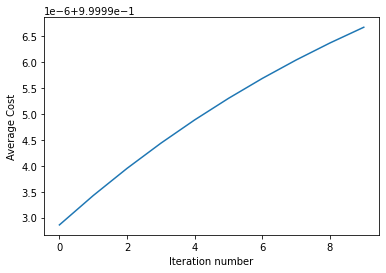

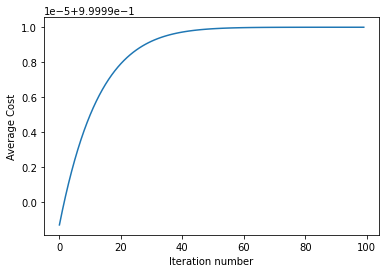

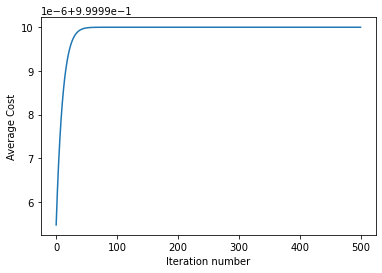

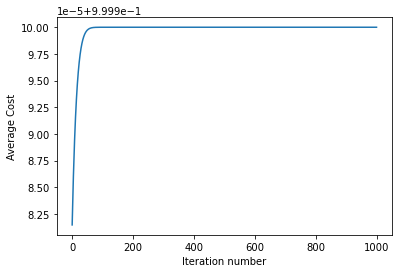

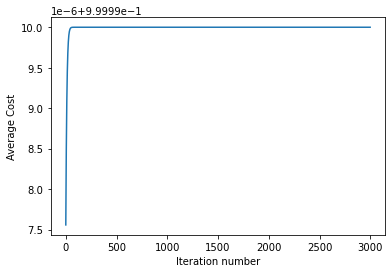

In [31]:
# plot the avg_cost_func depending on values
for i in range(len(itter)):
    plt.plot(avg_cost_vals[i])
    plt.ylabel('Average Cost')
    plt.xlabel('Iteration number')
    plt.block = False
    plt.show()

[10, 100, 500, 1000, 3000] [26.53846153846154, 72.6923076923077, 26.53846153846154, 26.53846153846154, 26.53846153846154] [22.62210796915167, 77.12082262210797, 22.62210796915167, 22.62210796915167, 22.62210796915167]
                          0          1          2          3          4
training Acuracy  22.622108  77.120823  22.622108  22.622108  22.622108
testing Accuracy  26.538462  72.692308  26.538462  26.538462  26.538462


<ipython-input-12-0879e0f3e655>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


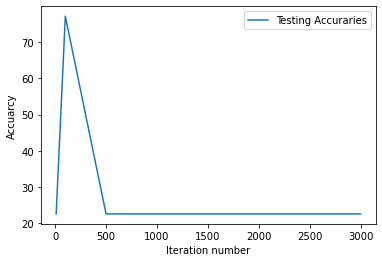

In [33]:
acc_tests = []
acc_trains = []
for i in range(len(itter)):
    y_pred_test = predict_y(w_vals[i], b_vals[i], X_test, 4)
    y_pred_train = predict_y(w_vals[i], b_vals[i], X_train, 4)
    acc_tests.append(accuracy_score(y_test, y_pred_test) * 100)
    acc_trains.append(accuracy_score(y_train, y_pred_train) * 100)
print(itter,acc_tests,acc_trains)
all_accuracy = np.vstack((acc_trains,acc_tests))
acc_table = pd.DataFrame(all_accuracy, index = ['training Acuracy', 'testing Accuracy'] )
print(acc_table)
acc_table.to_excel("sigma_ridge_4layer.xlsx")
plt.plot(itter,acc_trains)
plt.ylabel('Accuarcy')
plt.xlabel('Iteration number')
plt.legend([ "Testing Accuraries", "training accuracies"])
plt.block = False
plt.show()